## US Zip Code Populations

This is open source data available on the internet which is a few years out of date. Read through the whole of the question first so you can remove any columns from the data that are not required in advance. The dataset at https://tinyurl.com/TaskDataA has a number of variables including population by 5-digit ZIP code for (nearly) the whole of the USA (a fairly poor data dictionary can be downloaded here: https://tinyurl.com/TaskDataADesc). Zip code, or more properly ZCTA (Zip code tabulation area) is the ninth column. This dataset, however, does not have the US state of each ZIP code (despite the description implying it might), but the one at https://tinyurl.com/TaskDataZ does (ZCTA is the second column), so download and (inner) join the datasets.

For the following questions, where appropriate, use code that is concise, efficient, easy-to-read, and annotated to explain what’s going on. Where the answer is a 5-digit ZIP code, also give the state.

a) Which state has the most 5-digit ZIP codes, and how many such codes does it have?

b) Give the 5-digit ZIP code which is i) the most easterly, and then excluding Alaska ii) the most westerly and iii) the most northerly.

c) Which 5-digit ZIP code has the highest population density? Present that density in a sensible, informative way.

d) Below you will create another dataset where you aggregate 5-digit ZIP codes to 3-digit ZIP codes (based upon common first three digits), but before you do, you need to check state and ZIP alignment:

    i) Which 3-digit ZIP codes are common to more than one state?
    
    ii) Name the incongruous places (city). 


e) Create a new dataset based upon what you already have, which contains columns showing 3-digit ZIP codes, state, population and land area (exclude the places you found in d).

    i) How many 3-digit ZIP codes have a population smaller than 20,000 residents (ignore zero populations and assume any with single digits are also zero).

    ii) Produce a sensible plot to visualize the variation in population density of the ‘small’ 3-digit ZIP codes and comment upon it.

    iii) Where is the 3-digit ZIP code with the smallest population density? Is this a surprise?

--- Data Loading & Initial Exploration ---

    Importing the necessary libraries and load the two datasets

    df_a: Contains population, land area, and demographic data for each 5-digit ZIP Code Tabulation Area (ZCTA)
    df_z: Contains geographical and state-level information for each ZIP code.

    info() function used to understand the structure, data types, completeness and 
    helps to identify columns of interest and potential data quality issues before merging

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_a= pd.read_csv('C://Users//User//Desktop//jobs//DataVant//Task//tasksheetdataa.csv')
df_a

,fileid,stusab,chariter,cifsn,logrecno,p0010001,sumlev,geocomp,zcta5,arealand,areawatr,name,funcstat,pop100,hu100,intptlat,intptlon,lsadc
0,UR1US,US,0,1,479832,18570,860,0,601,166659789,799296,ZCTA5 00601,S,18570,7744,18.180556,-66.749961,Z5
1,UR1US,US,0,1,479836,41520,860,0,602,79288158,4446273,ZCTA5 00602,S,41520,18073,18.362268,-67.176130,Z5
2,UR1US,US,0,1,479839,54689,860,0,603,81880442,183425,ZCTA5 00603,S,54689,25653,18.455183,-67.119887,Z5
3,UR1US,US,0,1,479842,6615,860,0,606,109580061,12487,ZCTA5 00606,S,6615,2877,18.158345,-66.932911,Z5
4,UR1US,US,0,1,479847,29016,860,0,610,93021467,4172001,ZCTA5 00610,S,29016,12618,18.290955,-67.125868,Z5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,UR1US,US,0,1,590570,87,860,0,99923,35937519,2117,ZCTA5 99923,S,87,90,56.002315,-130.041026,Z5
33116,UR1US,US,0,1,590573,819,860,0,99925,144503281,36906383,ZCTA5 99925,S,819,400,55.550204,-132.945933,Z5
33117,UR1US,US,0,1,590576,1460,860,0,99926,343947256,213335869,ZCTA5 99926,S,1460,544,55.138069,-131.470741,Z5
33118,UR1US,US,0,1,590579,94,860,0,99927,589688205,18001151,ZCTA5 99927,S,94,101,56.239062,-133.457924,Z5


In [4]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fileid    33120 non-null  object 
 1   stusab    33120 non-null  object 
 2   chariter  33120 non-null  int64  
 3   cifsn     33120 non-null  int64  
 4   logrecno  33120 non-null  int64  
 5   p0010001  33120 non-null  int64  
 6   sumlev    33120 non-null  int64  
 7   geocomp   33120 non-null  int64  
 8   zcta5     33120 non-null  int64  
 9   arealand  33120 non-null  int64  
 10  areawatr  33120 non-null  int64  
 11  name      33120 non-null  object 
 12  funcstat  33120 non-null  object 
 13  pop100    33120 non-null  int64  
 14  hu100     33120 non-null  int64  
 15  intptlat  33120 non-null  float64
 16  intptlon  33120 non-null  float64
 17  lsadc     33120 non-null  object 
dtypes: float64(2), int64(11), object(5)
memory usage: 4.5+ MB


In [5]:
df_z= pd.read_csv('C://Users//User//Desktop//jobs//DataVant//Task//tasksheetdataz.csv')
df_z

,country,zip,city,state,stusab,county,county_fips,community,community_code,latitude,longitude,accuracy
0,US,99553,Akutan,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.1430,-165.7854,1.0
1,US,99571,Cold Bay,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.1858,-162.7211,1.0
2,US,99583,False Pass,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.8542,-163.4113,1.0
3,US,99612,King Cove,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.0628,-162.3056,1.0
4,US,99661,Sand Point,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.3192,-160.4914,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
41464,US,96558,APO AA,NaN,NaN,NaN,NaN,NaN,NaN,19.7542,-155.5858,4.0
41465,US,96598,FPO AA,NaN,NaN,NaN,NaN,NaN,NaN,-89.9976,139.2729,NaN
41466,US,96599,FPO AA,NaN,NaN,NaN,NaN,NaN,NaN,-77.8460,166.6760,NaN
41467,US,96860,FPO AA,NaN,NaN,NaN,NaN,NaN,NaN,21.3448,-157.9774,4.0


In [6]:
df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41469 entries, 0 to 41468
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         41469 non-null  object 
 1   zip             41469 non-null  int64  
 2   city            41469 non-null  object 
 3   state           40956 non-null  object 
 4   stusab          40958 non-null  object 
 5   county          40958 non-null  object 
 6   county_fips     40958 non-null  float64
 7   community       1 non-null      object 
 8   community_code  1 non-null      float64
 9   latitude        41469 non-null  float64
 10  longitude       41469 non-null  float64
 11  accuracy        40937 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 3.8+ MB


--- Data Preparation – ZIP Code Standardization & Merge ---

    We standardized the ZIP code columns in both dataframes:
    df_a['zcta5'] and df_z['zip'] were converted to strings and filled to 5 digits using str.zfill(5)
    This ensures consistency, for example, the ZIP code 356 becomes '00356'

    We merge the 2 datasets to 1 (df_merged) with inner join using the common column (zip code)

    The df_merged['arealand'] column in the dataset represents the land area of each ZIP code in square meters
    and we converted it into square kilometers to be more understandable

In [7]:
df_a['zcta5']= df_a['zcta5'].astype(str).str.zfill(5)
df_z['zip']= df_z['zip'].astype(str).str.zfill(5)

In [8]:
df_a['zcta5'][0]

'00601'

In [9]:
df_z[df_z['zip'].str.len()!= 5]

,country,zip,city,state,stusab,county,county_fips,community,community_code,latitude,longitude,accuracy


In [10]:
df_z[df_z['zip'].str.startswith('0')].head(5)

,country,zip,city,state,stusab,county,county_fips,community,community_code,latitude,longitude,accuracy
5553,US,06404,Botsford,Connecticut,CT,Fairfield,1.0,NaN,NaN,41.3665,-73.2571,4.0
5554,US,06440,Hawleyville,Connecticut,CT,Fairfield,1.0,NaN,NaN,41.4276,-73.3551,4.0
5555,US,06468,Monroe,Connecticut,CT,Fairfield,1.0,NaN,NaN,41.3312,-73.2243,4.0
5556,US,06470,Newtown,Connecticut,CT,Fairfield,1.0,NaN,NaN,41.3931,-73.3167,4.0
5557,US,06482,Sandy Hook,Connecticut,CT,Fairfield,1.0,NaN,NaN,41.4087,-73.2485,4.0


In [11]:
df_merged = pd.merge(df_a, df_z, left_on= 'zcta5', right_on= 'zip', how= 'inner')
df_merged.shape

(32974, 30)

In [12]:
df_merged.head(5)

,fileid,stusab_x,chariter,cifsn,logrecno,p0010001,sumlev,geocomp,zcta5,arealand,...,city,state,stusab_y,county,county_fips,community,community_code,latitude,longitude,accuracy
0,UR1US,US,0,1,480306,16769,860,0,01001,29635470,...,Agawam,Massachusetts,MA,Hampden,13.0,NaN,NaN,42.0702,-72.6227,4.0
1,UR1US,US,0,1,480309,29049,860,0,01002,142556362,...,Amherst,Massachusetts,MA,Hampshire,15.0,NaN,NaN,42.3671,-72.4646,4.0
2,UR1US,US,0,1,480313,10372,860,0,01003,1842384,...,Amherst,Massachusetts,MA,Hampshire,15.0,NaN,NaN,42.3919,-72.5248,4.0
3,UR1US,US,0,1,480316,5079,860,0,01005,114586903,...,Barre,Massachusetts,MA,Worcester,27.0,NaN,NaN,42.4097,-72.1084,4.0
4,UR1US,US,0,1,480319,14649,860,0,01007,136345999,...,Belchertown,Massachusetts,MA,Hampshire,15.0,NaN,NaN,42.2751,-72.4110,4.0


In [13]:
df_merged['area_km2']= df_merged['arealand']/ 1000000

In [14]:
df_merged

,fileid,stusab_x,chariter,cifsn,logrecno,p0010001,sumlev,geocomp,zcta5,arealand,...,state,stusab_y,county,county_fips,community,community_code,latitude,longitude,accuracy,area_km2
0,UR1US,US,0,1,480306,16769,860,0,01001,29635470,...,Massachusetts,MA,Hampden,13.0,NaN,NaN,42.0702,-72.6227,4.0,29.635470
1,UR1US,US,0,1,480309,29049,860,0,01002,142556362,...,Massachusetts,MA,Hampshire,15.0,NaN,NaN,42.3671,-72.4646,4.0,142.556362
2,UR1US,US,0,1,480313,10372,860,0,01003,1842384,...,Massachusetts,MA,Hampshire,15.0,NaN,NaN,42.3919,-72.5248,4.0,1.842384
3,UR1US,US,0,1,480316,5079,860,0,01005,114586903,...,Massachusetts,MA,Worcester,27.0,NaN,NaN,42.4097,-72.1084,4.0,114.586903
4,UR1US,US,0,1,480319,14649,860,0,01007,136345999,...,Massachusetts,MA,Hampshire,15.0,NaN,NaN,42.2751,-72.4110,4.0,136.345999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32969,UR1US,US,0,1,590570,87,860,0,99923,35937519,...,Alaska,AK,Prince of Wales-Hyder,198.0,NaN,NaN,55.9169,-130.0247,1.0,35.937519
32970,UR1US,US,0,1,590573,819,860,0,99925,144503281,...,Alaska,AK,Prince of Wales-Hyder,198.0,NaN,NaN,55.5526,-133.0555,4.0,144.503281
32971,UR1US,US,0,1,590576,1460,860,0,99926,343947256,...,Alaska,AK,Prince of Wales-Hyder,198.0,NaN,NaN,55.1215,-131.5790,4.0,343.947256
32972,UR1US,US,0,1,590579,94,860,0,99927,589688205,...,Alaska,AK,Prince of Wales-Hyder,198.0,NaN,NaN,56.3528,-133.6211,4.0,589.688205


--- Data Cleaning — Handling Missing Values ---

    We explored the structure of df_merged and the columns 'community' and 'community_code' 
    had almost all missing values (only 1 non-null entry), so they were dropped

    The columns 'state', 'stusab_y', 'county' and 'county_fips' had only 2 missing values, so either
    we could delete those rows (as 2 out of 32974 rows is <0.01% of the dataset) or we could try to replace 
    them with the actual as we did by finding columns which shares the same ZIP codes '96860' and '96863'

In [15]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32974 entries, 0 to 32973
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fileid          32974 non-null  object 
 1   stusab_x        32974 non-null  object 
 2   chariter        32974 non-null  int64  
 3   cifsn           32974 non-null  int64  
 4   logrecno        32974 non-null  int64  
 5   p0010001        32974 non-null  int64  
 6   sumlev          32974 non-null  int64  
 7   geocomp         32974 non-null  int64  
 8   zcta5           32974 non-null  object 
 9   arealand        32974 non-null  int64  
 10  areawatr        32974 non-null  int64  
 11  name            32974 non-null  object 
 12  funcstat        32974 non-null  object 
 13  pop100          32974 non-null  int64  
 14  hu100           32974 non-null  int64  
 15  intptlat        32974 non-null  float64
 16  intptlon        32974 non-null  float64
 17  lsadc           32974 non-null 

In [16]:
df_merged.isnull().sum()

fileid                0
stusab_x              0
chariter              0
cifsn                 0
logrecno              0
p0010001              0
sumlev                0
geocomp               0
zcta5                 0
arealand              0
areawatr              0
name                  0
funcstat              0
pop100                0
hu100                 0
intptlat              0
intptlon              0
lsadc                 0
country               0
zip                   0
city                  0
state                 2
stusab_y              2
county                2
county_fips           2
community         32973
community_code    32973
latitude              0
longitude             0
accuracy              0
area_km2              0
dtype: int64

In [17]:
df_merged.drop(columns= ['community', 'community_code'], inplace= True)

In [18]:
df_merged['stusab_x']

0        US
1        US
2        US
3        US
4        US
         ..
32969    US
32970    US
32971    US
32972    US
32973    US
Name: stusab_x, Length: 32974, dtype: object

In [19]:
df_merged['stusab_y']

0        MA
1        MA
2        MA
3        MA
4        MA
         ..
32969    AK
32970    AK
32971    AK
32972    AK
32973    AK
Name: stusab_y, Length: 32974, dtype: object

In [20]:
df_merged['state']

0        Massachusetts
1        Massachusetts
2        Massachusetts
3        Massachusetts
4        Massachusetts
             ...      
32969           Alaska
32970           Alaska
32971           Alaska
32972           Alaska
32973           Alaska
Name: state, Length: 32974, dtype: object

In [21]:
df_merged['county']

0                       Hampden
1                     Hampshire
2                     Hampshire
3                     Worcester
4                     Hampshire
                  ...          
32969     Prince of Wales-Hyder
32970     Prince of Wales-Hyder
32971     Prince of Wales-Hyder
32972     Prince of Wales-Hyder
32973    Wrangell-Petersburg (C
Name: county, Length: 32974, dtype: object

In [22]:
df_merged['county_fips']

0         13.0
1         15.0
2         15.0
3         27.0
4         15.0
         ...  
32969    198.0
32970    198.0
32971    198.0
32972    198.0
32973    280.0
Name: county_fips, Length: 32974, dtype: float64

In [23]:
pd.set_option('display.max_columns', None)
df_merged[df_merged[['state', 'stusab_y', 'county']].isnull().any(axis=1)]

,fileid,stusab_x,chariter,cifsn,logrecno,p0010001,sumlev,geocomp,zcta5,arealand,areawatr,name,funcstat,pop100,hu100,intptlat,intptlon,lsadc,country,zip,city,state,stusab_y,county,county_fips,latitude,longitude,accuracy,area_km2
31720,UR1US,US,0,1,586616,1124,860,0,96860,866337,0,ZCTA5 96860,S,1124,3,21.355654,-157.941231,Z5,US,96860,FPO AA,NaN,NaN,NaN,NaN,21.3448,-157.9774,4.0,0.866337
31722,UR1US,US,0,1,586619,52,860,0,96863,73422,0,ZCTA5 96863,S,52,0,21.448453,-157.762325,Z5,US,96863,FPO AA,NaN,NaN,NaN,NaN,21.4505,-157.7680,4.0,0.073422


In [24]:
df_merged[df_merged['zip'].isin(['96860', '96863'])]

,fileid,stusab_x,chariter,cifsn,logrecno,p0010001,sumlev,geocomp,zcta5,arealand,areawatr,name,funcstat,pop100,hu100,intptlat,intptlon,lsadc,country,zip,city,state,stusab_y,county,county_fips,latitude,longitude,accuracy,area_km2
31719,UR1US,US,0,1,586616,1124,860,0,96860,866337,0,ZCTA5 96860,S,1124,3,21.355654,-157.941231,Z5,US,96860,Jbphh,Hawaii,HI,Honolulu,3.0,21.3160,-157.8677,1.0,0.866337
31720,UR1US,US,0,1,586616,1124,860,0,96860,866337,0,ZCTA5 96860,S,1124,3,21.355654,-157.941231,Z5,US,96860,FPO AA,NaN,NaN,NaN,NaN,21.3448,-157.9774,4.0,0.866337
31721,UR1US,US,0,1,586619,52,860,0,96863,73422,0,ZCTA5 96863,S,52,0,21.448453,-157.762325,Z5,US,96863,Mcbh Kaneohe Bay,Hawaii,HI,Honolulu,3.0,21.3160,-157.8677,1.0,0.073422
31722,UR1US,US,0,1,586619,52,860,0,96863,73422,0,ZCTA5 96863,S,52,0,21.448453,-157.762325,Z5,US,96863,FPO AA,NaN,NaN,NaN,NaN,21.4505,-157.7680,4.0,0.073422


In [25]:
df_merged.loc[(df_merged['zip'].isin(['96860', '96863'])) & (df_merged['state'].isnull()),
             ['state', 'stusab_y', 'county', 'county_fips']]= ['Hawaii', 'HI', 'Honolulu', 3.0]

In [26]:
df_merged[(df_merged['zip']== '96860') | (df_merged['zip']== '96863')]

,fileid,stusab_x,chariter,cifsn,logrecno,p0010001,sumlev,geocomp,zcta5,arealand,areawatr,name,funcstat,pop100,hu100,intptlat,intptlon,lsadc,country,zip,city,state,stusab_y,county,county_fips,latitude,longitude,accuracy,area_km2
31719,UR1US,US,0,1,586616,1124,860,0,96860,866337,0,ZCTA5 96860,S,1124,3,21.355654,-157.941231,Z5,US,96860,Jbphh,Hawaii,HI,Honolulu,3.0,21.3160,-157.8677,1.0,0.866337
31720,UR1US,US,0,1,586616,1124,860,0,96860,866337,0,ZCTA5 96860,S,1124,3,21.355654,-157.941231,Z5,US,96860,FPO AA,Hawaii,HI,Honolulu,3.0,21.3448,-157.9774,4.0,0.866337
31721,UR1US,US,0,1,586619,52,860,0,96863,73422,0,ZCTA5 96863,S,52,0,21.448453,-157.762325,Z5,US,96863,Mcbh Kaneohe Bay,Hawaii,HI,Honolulu,3.0,21.3160,-157.8677,1.0,0.073422
31722,UR1US,US,0,1,586619,52,860,0,96863,73422,0,ZCTA5 96863,S,52,0,21.448453,-157.762325,Z5,US,96863,FPO AA,Hawaii,HI,Honolulu,3.0,21.4505,-157.7680,4.0,0.073422


In [27]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32974 entries, 0 to 32973
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fileid       32974 non-null  object 
 1   stusab_x     32974 non-null  object 
 2   chariter     32974 non-null  int64  
 3   cifsn        32974 non-null  int64  
 4   logrecno     32974 non-null  int64  
 5   p0010001     32974 non-null  int64  
 6   sumlev       32974 non-null  int64  
 7   geocomp      32974 non-null  int64  
 8   zcta5        32974 non-null  object 
 9   arealand     32974 non-null  int64  
 10  areawatr     32974 non-null  int64  
 11  name         32974 non-null  object 
 12  funcstat     32974 non-null  object 
 13  pop100       32974 non-null  int64  
 14  hu100        32974 non-null  int64  
 15  intptlat     32974 non-null  float64
 16  intptlon     32974 non-null  float64
 17  lsadc        32974 non-null  object 
 18  country      32974 non-null  object 
 19  zip 

In [28]:
df_merged.isnull().sum()

fileid         0
stusab_x       0
chariter       0
cifsn          0
logrecno       0
p0010001       0
sumlev         0
geocomp        0
zcta5          0
arealand       0
areawatr       0
name           0
funcstat       0
pop100         0
hu100          0
intptlat       0
intptlon       0
lsadc          0
country        0
zip            0
city           0
state          0
stusab_y       0
county         0
county_fips    0
latitude       0
longitude      0
accuracy       0
area_km2       0
dtype: int64

--- Question 1 ---

    We grouped our data by state and counted the number of unique 5-digit ZIP codes per state

In [29]:
most_zcodes= df_merged.groupby('state')['zip'].nunique().sort_values(ascending=False)
most_zcodes.head(5)

state
Texas           1935
Pennsylvania    1795
New York        1794
California      1761
Illinois        1383
Name: zip, dtype: int64

In [30]:
print('The state with the most 5-digit ZIP codes is', most_zcodes.idxmax(), 'with', most_zcodes.max(), 'unique Zip codes')

The state with the most 5-digit ZIP codes is Texas with 1935 unique Zip codes


--- Question 2 ---

--- Question 2.i ---

    To find the most easterly ZIP code in the U.S., we sorted our data by longitude in descending order as
    the larger (less negative) the longitude, the closer to the eastern edge of the country it is 

In [31]:
df_merged['longitude'].max()

-67.0074

In [32]:
top_easterly= df_merged.sort_values(by= 'longitude', ascending= False)
top_easterly[['zip', 'city', 'state', 'longitude']].head(5)

,zip,city,state,longitude
1129,04631,Eastport,Maine,-67.0074
1142,04652,Lubec,Maine,-67.0408
1152,04667,Perry,Maine,-67.0929
1155,04671,Robbinston,Maine,-67.1433
1151,04666,Pembroke,Maine,-67.2002


In [33]:
print(f"The 5-digit ZIP code which is the most easterly is {top_easterly.iloc[0]['zip']} and refers to {top_easterly.iloc[0]['city']}, {top_easterly.iloc[0]['state']}")

The 5-digit ZIP code which is the most easterly is 04631 and refers to Eastport, Maine


--- Question 2.ii ---

    Since longitude gets more negative the further west you go, the minimum value of longitude 
    gives us the western point

    We created a new dataframe (df_merged_noAlaska) without Alaska
    Then checked in our intial df (df_merged) with Alaska to find the top_west_states see the second 
    western state (Hawaii) to verify our output without Alaska later.

In [34]:
df_merged_noAlaska= df_merged[df_merged['state']!= 'Alaska']

--- With Alaska ---

In [35]:
df_merged['longitude'].min()

-176.634

In [36]:
top_west= df_merged.sort_values(by= 'longitude')
top_west[['zip', 'city', 'state', 'longitude']].head(5)

,zip,city,state,longitude
32752,99546,Adak,Alaska,-176.6340
32753,99547,Atka,Alaska,-174.2006
32901,99742,Gambell,Alaska,-171.7017
32928,99769,Savoonga,Alaska,-170.4709
32841,99660,Saint Paul Island,Alaska,-170.2764


In [37]:
top_west_states= df_merged.groupby('state')['longitude'].min().sort_values()
top_west_states.head(5)

state
Alaska       -176.6340
Hawaii       -159.9214
Washington   -124.6261
Oregon       -124.4913
California   -124.2514
Name: longitude, dtype: float64

--- Without Alaska ---

In [38]:
df_merged_noAlaska['longitude'].min()

-159.9214

In [39]:
top_westerly_noAlaska= df_merged_noAlaska.sort_values(by= 'longitude')
top_westerly_noAlaska[['zip', 'city', 'state', 'longitude']].head(5)

,zip,city,state,longitude
31680,96769,Makaweli,Hawaii,-159.9214
31665,96752,Kekaha,Hawaii,-159.7199
31702,96796,Waimea,Hawaii,-159.6689
31660,96747,Kaumakani,Hawaii,-159.6241
31638,96716,Hanapepe,Hawaii,-159.5920


In [40]:
print(f"The 5-digit ZIP code which is the most westerly, excluding Alaska, is {top_westerly_noAlaska.iloc[0]['zip']} and refers to {top_westerly_noAlaska.iloc[0]['city']}, {top_westerly_noAlaska.iloc[0]['state']}")

The 5-digit ZIP code which is the most westerly, excluding Alaska, is 96769 and refers to Makaweli, Hawaii


--- Question 2.iii ---

    To find the most northern ZIP code, we look at the maximum latitude
    Same as before we checked once with Alaska and then without

--- With Alaska ---

In [41]:
north= df_merged.sort_values(by= 'latitude')
north[['zip', 'city', 'state', 'latitude']]

,zip,city,state,latitude
31683,96772,Naalehu,Hawaii,19.0668
31652,96737,Ocean View,Hawaii,19.1002
31687,96777,Pahala,Hawaii,19.2079
31644,96726,Honaunau,Hawaii,19.4273
31629,96704,Captain Cook,Hawaii,19.4386
...,...,...,...,...
32946,99789,Nuiqsut,Alaska,70.1927
32894,99734,Prudhoe Bay,Alaska,70.2922
32948,99791,Atqasuk,Alaska,70.4947
32940,99782,Wainwright,Alaska,70.6369


In [42]:
top_north_states= df_merged.groupby('state')['latitude'].max().sort_values(ascending= False)
top_north_states.head(5)

state
Alaska        71.2346
Minnesota     49.3453
Idaho         48.9994
Montana       48.9961
Washington    48.9879
Name: latitude, dtype: float64

In [43]:
top_northest= df_merged.sort_values(by= 'latitude', ascending= False)
top_northest[['zip', 'city', 'state', 'latitude']].head(5)

,zip,city,state,latitude
32886,99723,Barrow,Alaska,71.2346
32940,99782,Wainwright,Alaska,70.6369
32948,99791,Atqasuk,Alaska,70.4947
32894,99734,Prudhoe Bay,Alaska,70.2922
32946,99789,Nuiqsut,Alaska,70.1927


In [44]:
print(f"The 5-digit ZIP code which is the most northerly is {top_northest.iloc[0]['zip']} and refers to {top_northest.iloc[0]['city']}, {top_northest.iloc[0]['state']}")

The 5-digit ZIP code which is the most northerly is 99723 and refers to Barrow, Alaska


--- Without Alaska ---

In [45]:
top_northerly_noAlaska= df_merged_noAlaska.sort_values(by= 'latitude', ascending= False)
top_northerly_noAlaska[['zip', 'city', 'state', 'latitude']].head(5)

,zip,city,state,latitude
19123,56711,Angle Inlet,Minnesota,49.3453
19146,56741,Oak Island,Minnesota,49.3135
28590,83826,Eastport,Idaho,48.9994
20113,59484,Sweet Grass,Montana,48.9961
32288,98281,Point Roberts,Washington,48.9879


In [46]:
print(f"The 5-digit ZIP code which is the most northerly, excluding Alaska, is {top_northerly_noAlaska.iloc[0]['zip']} and refers to {top_northerly_noAlaska.iloc[0]['city']}, {top_northerly_noAlaska.iloc[0]['state']}")

The 5-digit ZIP code which is the most northerly, excluding Alaska, is 56711 and refers to Angle Inlet, Minnesota


--- Question 3 ---

    We calculated the population density for each 5-digit ZIP code by dividing 
    the total population ('pop100') by the land area ('area_km2')

    The top 5 most densely populated ZIP codes were visualized using a bar chart, 
    showing both the ZIP and the associated state

In [47]:
df_merged['pop_density_km2']= round(df_merged['pop100'] / df_merged['area_km2'])
df_merged['pop_density_km2']

0         566.0
1         204.0
2        5630.0
3          44.0
4         107.0
          ...  
32969       2.0
32970       6.0
32971       4.0
32972       0.0
32973       0.0
Name: pop_density_km2, Length: 32974, dtype: float64

In [48]:
df_merged['pop_density_km2'].max()

66553.0

In [49]:
top_pop_density= df_merged.sort_values(by= 'pop_density_km2', ascending= False)
top_pop_density[['zip', 'city', 'state', 'pop_density_km2']].head(5)

,zip,city,state,pop_density_km2
6105,20052,Washington,District of Columbia,66553.0
2479,10162,New York,New York,57231.0
2452,10028,New York,New York,55476.0
2468,10075,New York,New York,54651.0
6166,20390,Washington,District of Columbia,53406.0


In [50]:
print(f"The 5-digit ZIP code with the highest population density is {top_pop_density.iloc[0]['zip']}, located in {top_pop_density.iloc[0]['city']}, {top_pop_density.iloc[0]['state']}.")
print(f"It has a population density of {top_pop_density.iloc[0]['pop_density_km2']} people per square kilometer.")

The 5-digit ZIP code with the highest population density is 20052, located in Washington, District of Columbia.
It has a population density of 66553.0 people per square kilometer.


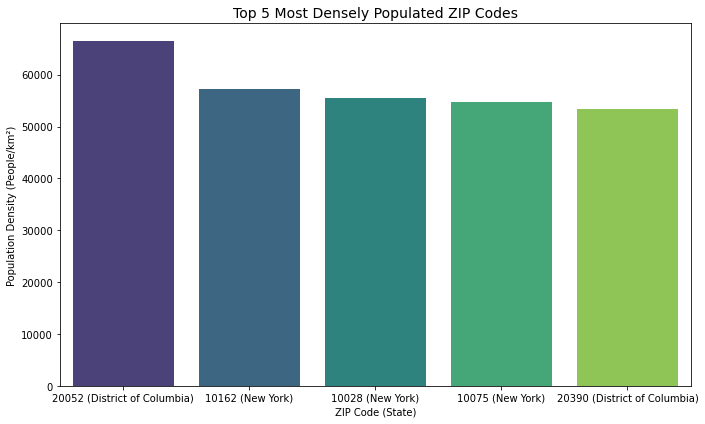

In [51]:
top5_density= top_pop_density.head(5).copy()
top5_density['label']= top5_density['zip'] + ' (' + top5_density['state'] + ')'

plt.figure(figsize=(10, 6))
sns.barplot(x= 'label', y= 'pop_density_km2', data= top5_density, palette= 'viridis')

plt.title('Top 5 Most Densely Populated ZIP Codes', fontsize= 14)
plt.xlabel('ZIP Code (State)')
plt.ylabel('Population Density (People/km²)')
plt.tight_layout()
plt.show()

--- Question 4 ---

--- Question 4.a ---

    Created a new column 'zip3c' by slicing the first three digits of the ZIP code
    We grouped by that and counted the number of unique states per zip3c
    Then we found how many states share the same 3-digit ZIP codes and which are they

In [52]:
df_merged['zip3c']= df_merged['zip'].str[:3]
df_merged.head(5)

,fileid,stusab_x,chariter,cifsn,logrecno,p0010001,sumlev,geocomp,zcta5,arealand,areawatr,name,funcstat,pop100,hu100,intptlat,intptlon,lsadc,country,zip,city,state,stusab_y,county,county_fips,latitude,longitude,accuracy,area_km2,pop_density_km2,zip3c
0,UR1US,US,0,1,480306,16769,860,0,01001,29635470,2229770,ZCTA5 01001,S,16769,7557,42.062332,-72.628274,Z5,US,01001,Agawam,Massachusetts,MA,Hampden,13.0,42.0702,-72.6227,4.0,29.635470,566.0,010
1,UR1US,US,0,1,480309,29049,860,0,01002,142556362,4280260,ZCTA5 01002,S,29049,10388,42.363977,-72.458507,Z5,US,01002,Amherst,Massachusetts,MA,Hampshire,15.0,42.3671,-72.4646,4.0,142.556362,204.0,010
2,UR1US,US,0,1,480313,10372,860,0,01003,1842384,12788,ZCTA5 01003,S,10372,5,42.389941,-72.524108,Z5,US,01003,Amherst,Massachusetts,MA,Hampshire,15.0,42.3919,-72.5248,4.0,1.842384,5630.0,010
3,UR1US,US,0,1,480316,5079,860,0,01005,114586903,667042,ZCTA5 01005,S,5079,2044,42.418848,-72.106598,Z5,US,01005,Barre,Massachusetts,MA,Worcester,27.0,42.4097,-72.1084,4.0,114.586903,44.0,010
4,UR1US,US,0,1,480319,14649,860,0,01007,136345999,6943853,ZCTA5 01007,S,14649,5839,42.279010,-72.400468,Z5,US,01007,Belchertown,Massachusetts,MA,Hampshire,15.0,42.2751,-72.4110,4.0,136.345999,107.0,010


In [53]:
zip3c_states= df_merged.groupby('zip3c')['state'].nunique().reset_index()
zip3c_states.columns= ['zip3c', 'num_states']
zip3c_states

,zip3c,num_states
0,010,1
1,011,1
2,012,1
3,013,1
4,014,1
...,...,...
886,995,1
887,996,1
888,997,1
889,998,1


In [54]:
states_with_com_zip3c= zip3c_states[zip3c_states['num_states']> 1]
states_with_com_zip3c

,zip3c,num_states
52,063,2
759,834,2


In [55]:
print(f"The 3-digit ZIP codes, which are common to more than one state is {states_with_com_zip3c.iloc[0]['zip3c']} and {states_with_com_zip3c.iloc[1]['zip3c']} ")

The 3-digit ZIP codes, which are common to more than one state is 063 and 834 


In [56]:
df_merged[df_merged['zip3c'].isin(['063', '834'])].groupby('zip3c')['state'].unique()

zip3c
063    [Connecticut, New York]
834           [Idaho, Wyoming]
Name: state, dtype: object

--- Question 4.b ---

    First created a filtered dataset (com_zip3c) containing only the entries 
    where the 3-digit ZIP code (zip3c ('063' and '834')) is shared across more than one state

    Extracted unique combinations of the 3-digit ZIP code, city, and state to identify incongruous places
    Removed the duplicates as we want to present the cities who belong in those states
    Made a list with those cities

In [57]:
com_zip3c= df_merged[df_merged['zip3c'].isin(states_with_com_zip3c['zip3c'])]
com_zip3c

,fileid,stusab_x,chariter,cifsn,logrecno,p0010001,sumlev,geocomp,zcta5,arealand,areawatr,name,funcstat,pop100,hu100,intptlat,intptlon,lsadc,country,zip,city,state,stusab_y,county,county_fips,latitude,longitude,accuracy,area_km2,pop_density_km2,zip3c
1654,UR1US,US,0,1,485350,27617,860,0,06320,14325302,5159756,ZCTA5 06320,S,27617,11838,41.347850,-72.102451,Z5,US,06320,New London,Connecticut,CT,New London,11.0,41.3507,-72.1062,4.0,14.325302,1928.0,063
1655,UR1US,US,0,1,485353,3282,860,0,06330,47409306,1522044,ZCTA5 06330,S,3282,1367,41.635570,-72.077527,Z5,US,06330,Baltic,Connecticut,CT,New London,11.0,41.6263,-72.0775,4.0,47.409306,69.0,063
1656,UR1US,US,0,1,485357,5137,860,0,06331,103468837,683786,ZCTA5 06331,S,5137,2045,41.695706,-72.003414,Z5,US,06331,Canterbury,Connecticut,CT,Windham,15.0,41.6844,-72.0010,4.0,103.468837,50.0,063
1657,UR1US,US,0,1,485360,258,860,0,06332,1190715,11477,ZCTA5 06332,S,258,110,41.731215,-71.902335,Z5,US,06332,Central Village,Connecticut,CT,Windham,15.0,41.7229,-71.9067,4.0,1.190715,217.0,063
1658,UR1US,US,0,1,485363,6607,860,0,06333,60660513,1656168,ZCTA5 06333,S,6607,2505,41.388969,-72.232102,Z5,US,06333,East Lyme,Connecticut,CT,New London,11.0,41.3668,-72.2330,1.0,60.660513,109.0,063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28477,UR1US,US,0,1,576472,109,860,0,83465,480504467,460515,ZCTA5 83465,S,109,78,44.784888,-113.674737,Z5,US,83465,Lemhi,Idaho,ID,Lemhi,59.0,44.8516,-113.6198,4.0,480.504467,0.0,834
28478,UR1US,US,0,1,576475,273,860,0,83466,752640941,2347917,ZCTA5 83466,S,273,243,45.414846,-114.046629,Z5,US,83466,North Fork,Idaho,ID,Lemhi,59.0,45.4242,-114.0419,4.0,752.640941,0.0,834
28479,UR1US,US,0,1,576478,6270,860,0,83467,1961914237,5558865,ZCTA5 83467,S,6270,3398,44.980597,-113.897498,Z5,US,83467,Salmon,Idaho,ID,Lemhi,59.0,45.1571,-113.8784,4.0,1961.914237,3.0,834
28480,UR1US,US,0,1,576481,170,860,0,83468,420394725,17350,ZCTA5 83468,S,170,110,44.922260,-113.592332,Z5,US,83468,Tendoy,Idaho,ID,Lemhi,59.0,44.9681,-113.8167,4.0,420.394725,0.0,834


In [58]:
unique_com_zip3c= com_zip3c[['zip3c', 'city', 'state']].drop_duplicates()

In [59]:
unique_com_zip3c= unique_com_zip3c.sort_values(by=['zip3c', 'state', 'city'])
unique_com_zip3c

,zip3c,city,state
1655,063,Baltic,Connecticut
1659,063,Bozrah,Connecticut
1656,063,Canterbury,Connecticut
1657,063,Central Village,Connecticut
1658,063,East Lyme,Connecticut
...,...,...,...
28469,834,Teton,Idaho
28470,834,Tetonia,Idaho
28471,834,Ucon,Idaho
28472,834,Victor,Idaho


In [60]:
inc_places= unique_com_zip3c['city'].unique().tolist()
inc_places= ', '.join(sorted(inc_places))
print(inc_places)

Alta, Ashton, Baltic, Bozrah, Canterbury, Carmen, Central Village, Chester, Driggs, Dubois, East Lyme, Felt, Fishers Island, Gales Ferry, Gibbonsville, Gilman, Groton, Hamer, Hanover, Idaho Falls, Iona, Irwin, Island Park, Jewett City, Leadore, Ledyard, Lemhi, Lewisville, Macks Inn, Menan, Monteview, Montville, Moosup, Mystic, New London, Newdale, Niantic, North Fork, North Stonington, Norwich, Oakdale, Old Lyme, Oneco, Pawcatuck, Plainfield, Preston, Quaker Hill, Rexburg, Rigby, Ririe, Roberts, Saint Anthony, Salmon, Shoup, South Lyme, Spencer, Sterling, Stonington, Sugar City, Swan Valley, Taftville, Tendoy, Terreton, Teton, Tetonia, Ucon, Uncasville, Victor, Voluntown, Waterford, Wauregan, Yantic


--- Question 5 ---

    Created a df (df_no_com_zip3c) exclude the places from Q4
    Selected only the needed columns ('zip3c', 'state', 'pop100', 'area_km2')
    Grouped and aggregated by summing the population and land area per ZIP3-state

In [61]:
df_no_com_zip3c= df_merged[~df_merged['zip3c'].isin(states_with_com_zip3c['zip3c'])]
df_no_com_zip3c

,fileid,stusab_x,chariter,cifsn,logrecno,p0010001,sumlev,geocomp,zcta5,arealand,areawatr,name,funcstat,pop100,hu100,intptlat,intptlon,lsadc,country,zip,city,state,stusab_y,county,county_fips,latitude,longitude,accuracy,area_km2,pop_density_km2,zip3c
0,UR1US,US,0,1,480306,16769,860,0,01001,29635470,2229770,ZCTA5 01001,S,16769,7557,42.062332,-72.628274,Z5,US,01001,Agawam,Massachusetts,MA,Hampden,13.0,42.0702,-72.6227,4.0,29.635470,566.0,010
1,UR1US,US,0,1,480309,29049,860,0,01002,142556362,4280260,ZCTA5 01002,S,29049,10388,42.363977,-72.458507,Z5,US,01002,Amherst,Massachusetts,MA,Hampshire,15.0,42.3671,-72.4646,4.0,142.556362,204.0,010
2,UR1US,US,0,1,480313,10372,860,0,01003,1842384,12788,ZCTA5 01003,S,10372,5,42.389941,-72.524108,Z5,US,01003,Amherst,Massachusetts,MA,Hampshire,15.0,42.3919,-72.5248,4.0,1.842384,5630.0,010
3,UR1US,US,0,1,480316,5079,860,0,01005,114586903,667042,ZCTA5 01005,S,5079,2044,42.418848,-72.106598,Z5,US,01005,Barre,Massachusetts,MA,Worcester,27.0,42.4097,-72.1084,4.0,114.586903,44.0,010
4,UR1US,US,0,1,480319,14649,860,0,01007,136345999,6943853,ZCTA5 01007,S,14649,5839,42.279010,-72.400468,Z5,US,01007,Belchertown,Massachusetts,MA,Hampshire,15.0,42.2751,-72.4110,4.0,136.345999,107.0,010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32969,UR1US,US,0,1,590570,87,860,0,99923,35937519,2117,ZCTA5 99923,S,87,90,56.002315,-130.041026,Z5,US,99923,Hyder,Alaska,AK,Prince of Wales-Hyder,198.0,55.9169,-130.0247,1.0,35.937519,2.0,999
32970,UR1US,US,0,1,590573,819,860,0,99925,144503281,36906383,ZCTA5 99925,S,819,400,55.550204,-132.945933,Z5,US,99925,Klawock,Alaska,AK,Prince of Wales-Hyder,198.0,55.5526,-133.0555,4.0,144.503281,6.0,999
32971,UR1US,US,0,1,590576,1460,860,0,99926,343947256,213335869,ZCTA5 99926,S,1460,544,55.138069,-131.470741,Z5,US,99926,Metlakatla,Alaska,AK,Prince of Wales-Hyder,198.0,55.1215,-131.5790,4.0,343.947256,4.0,999
32972,UR1US,US,0,1,590579,94,860,0,99927,589688205,18001151,ZCTA5 99927,S,94,101,56.239062,-133.457924,Z5,US,99927,Point Baker,Alaska,AK,Prince of Wales-Hyder,198.0,56.3528,-133.6211,4.0,589.688205,0.0,999


In [62]:
df_zip3_clean= df_no_com_zip3c[['zip3c', 'state', 'pop100', 'area_km2']]
df_zip3_clean

,zip3c,state,pop100,area_km2
0,010,Massachusetts,16769,29.635470
1,010,Massachusetts,29049,142.556362
2,010,Massachusetts,10372,1.842384
3,010,Massachusetts,5079,114.586903
4,010,Massachusetts,14649,136.345999
...,...,...,...,...
32969,999,Alaska,87,35.937519
32970,999,Alaska,819,144.503281
32971,999,Alaska,1460,343.947256
32972,999,Alaska,94,589.688205


In [63]:
zip3_grouped= df_zip3_clean.groupby(['zip3c', 'state']).agg(population= ('pop100', 'sum'), land_area_km2= ('area_km2', 'sum')).reset_index()
zip3_grouped

,zip3c,state,population,land_area_km2
0,010,Massachusetts,469375,3280.116609
1,011,Massachusetts,168835,106.083030
2,012,Massachusetts,130689,2360.467856
3,013,Massachusetts,83111,2029.083678
4,014,Massachusetts,211812,1231.149054
...,...,...,...,...
884,995,Alaska,320660,149810.726268
885,996,Alaska,184083,138819.400255
886,997,Alaska,134189,261368.179739
887,998,Alaska,49595,35487.047529


--- Question 5.a ---

    I filtered the dataset using 10 <= population < 20000 to have
    a population smaller than 20,000 (ignoring zeros and assuming single-digit counts as zero) 

In [64]:
small_pop= zip3_grouped[(zip3_grouped['population']< 20000) & (zip3_grouped['population']>= 10)]
small_pop_sorted= small_pop.sort_values(by= 'population', ascending= False)
small_pop_sorted

,zip3c,state,population,land_area_km2
337,369,Alabama,19164,3159.815117
787,878,New Mexico,18552,24362.674732
788,879,New Mexico,17432,7110.318330
793,884,New Mexico,17370,25465.767488
747,823,Wyoming,16430,13883.818454
509,556,Minnesota,16024,7788.672063
26,036,New Hampshire,13759,525.626811
80,102,New York,12636,0.636442
796,893,Nevada,12103,18040.900958
632,692,Nebraska,8637,12215.685056


In [65]:
print(f"The 3-digit ZIP codes, which have a population smaller than 20,000 residents is: {small_pop.shape[0]}")

The 3-digit ZIP codes, which have a population smaller than 20,000 residents is: 13


--- Question 5.b ---

    Calculated the population density (people per km²) for all 3-digit ZIP codes
    Because of the huge range of density values I used 3 plots to show population density/km2

    1) Log-Scaled Boxplot
       We used log scare to capture the skewed distribution, 
       especially due to extreme outliers like: New York,  District of Columbia and New Hampshire

    2) Distribution Plot (Raw Scale)
       Gave us a general feel of how density values are distributed

    3) Distribution Plot (Log Scale)
       To overcome skewness and emphasize the spread, we applied a logarithmic transformation to the x-axis

    Most of 3-digit ZIP codes in this population range are very sparsely populated,
    indicating large wilderness areas with density under 6 people/km²
    New York (zip3c: 102) is an extreme outlier due to its tiny area and built-up nature

In [66]:
small_pop_sorted['pop_density_km2']= small_pop_sorted['population']/ small_pop_sorted['land_area_km2']

In [67]:
small_pop_sorted

,zip3c,state,population,land_area_km2,pop_density_km2
337,369,Alabama,19164,3159.815117,6.064912
787,878,New Mexico,18552,24362.674732,0.761493
788,879,New Mexico,17432,7110.318330,2.451648
793,884,New Mexico,17370,25465.767488,0.682092
747,823,Wyoming,16430,13883.818454,1.183392
509,556,Minnesota,16024,7788.672063,2.057347
26,036,New Hampshire,13759,525.626811,26.176366
80,102,New York,12636,0.636442,19854.126535
796,893,Nevada,12103,18040.900958,0.670864
632,692,Nebraska,8637,12215.685056,0.707042


In [68]:
small_pop_sorted.sort_values(by= 'pop_density_km2', ascending= False)

,zip3c,state,population,land_area_km2,pop_density_km2
80,102,New York,12636,0.636442,19854.126535
180,203,District of Columbia,1702,2.489901,683.561314
26,036,New Hampshire,13759,525.626811,26.176366
337,369,Alabama,19164,3159.815117,6.064912
48,059,Vermont,3525,1168.172499,3.017534
788,879,New Mexico,17432,7110.318330,2.451648
509,556,Minnesota,16024,7788.672063,2.057347
747,823,Wyoming,16430,13883.818454,1.183392
787,878,New Mexico,18552,24362.674732,0.761493
632,692,Nebraska,8637,12215.685056,0.707042


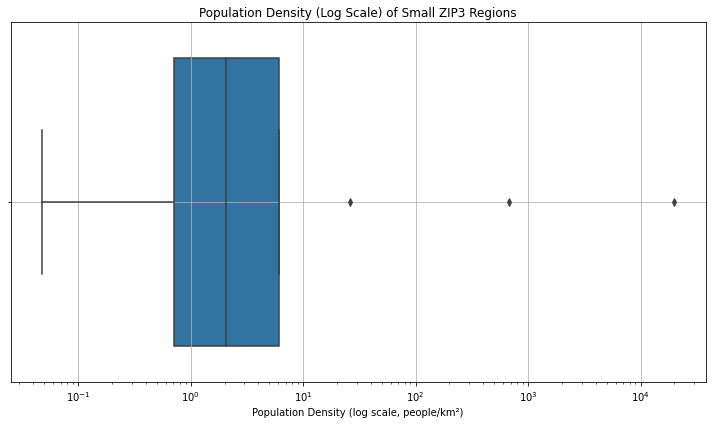

In [69]:
plt.figure(figsize= (10, 6))
sns.boxplot(x= small_pop_sorted['pop_density_km2'])

plt.xscale('log')
plt.title('Population Density (Log Scale) of Small ZIP3 Regions')
plt.xlabel('Population Density (log scale, people/km²)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

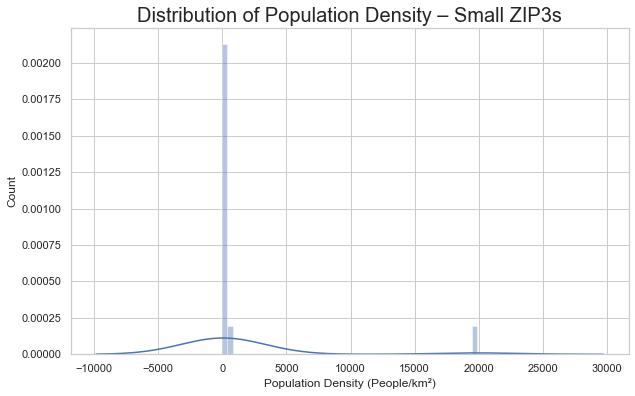

In [70]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(small_pop_sorted['pop_density_km2'])
plt.title('Distribution of Population Density – Small ZIP3s', fontsize = 20)
plt.xlabel('Population Density (People/km²)')
plt.ylabel('Count')

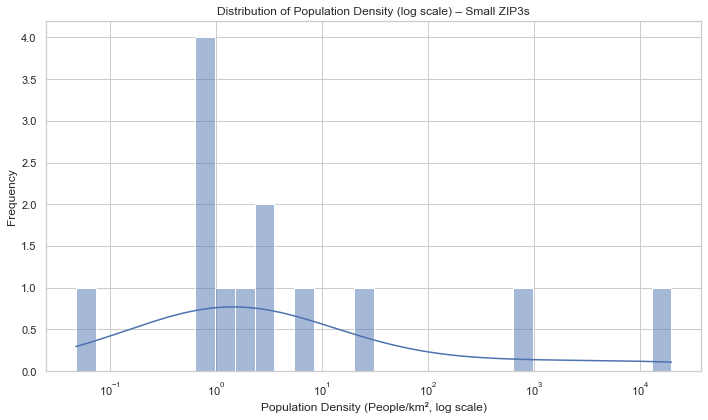

In [71]:
plt.figure(figsize= (10, 6))
sns.histplot(data= small_pop_sorted, x= 'pop_density_km2', bins= 30, kde= True, log_scale= (True, False))

plt.title('Distribution of Population Density (log scale) – Small ZIP3s')
plt.xlabel('Population Density (People/km², log scale)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


--- Question 5.c ---

    Wyoming is the 3-digit ZIP code with the smallest population density
    It is not a suprise as is well-known for its vast open landscapes (plains, mountains, national parks and ranches)

    !!! Fun Fact !!!!

    Wyoming's nicknamed the Equality State because it was the first state to grant women the right to vote 
    and to have women serve on juries and hold public office with the first to elect a female governor:Nellie Tayloe Ross

In [72]:
small_pop_sorted

,zip3c,state,population,land_area_km2,pop_density_km2
337,369,Alabama,19164,3159.815117,6.064912
787,878,New Mexico,18552,24362.674732,0.761493
788,879,New Mexico,17432,7110.318330,2.451648
793,884,New Mexico,17370,25465.767488,0.682092
747,823,Wyoming,16430,13883.818454,1.183392
509,556,Minnesota,16024,7788.672063,2.057347
26,036,New Hampshire,13759,525.626811,26.176366
80,102,New York,12636,0.636442,19854.126535
796,893,Nevada,12103,18040.900958,0.670864
632,692,Nebraska,8637,12215.685056,0.707042


In [73]:
print(f"The 3-digit ZIP code with the smallest population density is in {small_pop_sorted.iloc[12]['state']} with population density: {small_pop_sorted.iloc[12]['pop_density_km2']}")

The 3-digit ZIP code with the smallest population density is in Wyoming with population density: 0.047931453588293815


--- Question 6 ---

    For the comparison of the distributions of population sizes for 5-digit 
    and 3-digit ZIP codes we used df_merged and zip3_grouped dataframes, where in the
    1st we used only the 5 most necessary columns ('zcta5', 'state', 'pop100', 'area_km2', 'pop_density_km2')
    and created df_merged_pop

    We plot the distributions of population sepertly and then we compared them together in one plot

--- Distribution of population sizes for 5-digit ---

    Shows a much wider spread and higher peak density values. There are extreme outliers, with population densities exceeding       10,000 people/km², indicating very dense urban areas like Manhattan (NYC) or Washington, D.C.
    The distribution is right-skewed, with most ZIP codes having moderate to low density but a long tail toward high values

In [74]:
df_merged

,fileid,stusab_x,chariter,cifsn,logrecno,p0010001,sumlev,geocomp,zcta5,arealand,areawatr,name,funcstat,pop100,hu100,intptlat,intptlon,lsadc,country,zip,city,state,stusab_y,county,county_fips,latitude,longitude,accuracy,area_km2,pop_density_km2,zip3c
0,UR1US,US,0,1,480306,16769,860,0,01001,29635470,2229770,ZCTA5 01001,S,16769,7557,42.062332,-72.628274,Z5,US,01001,Agawam,Massachusetts,MA,Hampden,13.0,42.0702,-72.6227,4.0,29.635470,566.0,010
1,UR1US,US,0,1,480309,29049,860,0,01002,142556362,4280260,ZCTA5 01002,S,29049,10388,42.363977,-72.458507,Z5,US,01002,Amherst,Massachusetts,MA,Hampshire,15.0,42.3671,-72.4646,4.0,142.556362,204.0,010
2,UR1US,US,0,1,480313,10372,860,0,01003,1842384,12788,ZCTA5 01003,S,10372,5,42.389941,-72.524108,Z5,US,01003,Amherst,Massachusetts,MA,Hampshire,15.0,42.3919,-72.5248,4.0,1.842384,5630.0,010
3,UR1US,US,0,1,480316,5079,860,0,01005,114586903,667042,ZCTA5 01005,S,5079,2044,42.418848,-72.106598,Z5,US,01005,Barre,Massachusetts,MA,Worcester,27.0,42.4097,-72.1084,4.0,114.586903,44.0,010
4,UR1US,US,0,1,480319,14649,860,0,01007,136345999,6943853,ZCTA5 01007,S,14649,5839,42.279010,-72.400468,Z5,US,01007,Belchertown,Massachusetts,MA,Hampshire,15.0,42.2751,-72.4110,4.0,136.345999,107.0,010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32969,UR1US,US,0,1,590570,87,860,0,99923,35937519,2117,ZCTA5 99923,S,87,90,56.002315,-130.041026,Z5,US,99923,Hyder,Alaska,AK,Prince of Wales-Hyder,198.0,55.9169,-130.0247,1.0,35.937519,2.0,999
32970,UR1US,US,0,1,590573,819,860,0,99925,144503281,36906383,ZCTA5 99925,S,819,400,55.550204,-132.945933,Z5,US,99925,Klawock,Alaska,AK,Prince of Wales-Hyder,198.0,55.5526,-133.0555,4.0,144.503281,6.0,999
32971,UR1US,US,0,1,590576,1460,860,0,99926,343947256,213335869,ZCTA5 99926,S,1460,544,55.138069,-131.470741,Z5,US,99926,Metlakatla,Alaska,AK,Prince of Wales-Hyder,198.0,55.1215,-131.5790,4.0,343.947256,4.0,999
32972,UR1US,US,0,1,590579,94,860,0,99927,589688205,18001151,ZCTA5 99927,S,94,101,56.239062,-133.457924,Z5,US,99927,Point Baker,Alaska,AK,Prince of Wales-Hyder,198.0,56.3528,-133.6211,4.0,589.688205,0.0,999


In [75]:
df_merged_pop= df_merged[['zcta5', 'state', 'pop100', 'area_km2', 'pop_density_km2']]
df_merged_pop

,zcta5,state,pop100,area_km2,pop_density_km2
0,01001,Massachusetts,16769,29.635470,566.0
1,01002,Massachusetts,29049,142.556362,204.0
2,01003,Massachusetts,10372,1.842384,5630.0
3,01005,Massachusetts,5079,114.586903,44.0
4,01007,Massachusetts,14649,136.345999,107.0
...,...,...,...,...,...
32969,99923,Alaska,87,35.937519,2.0
32970,99925,Alaska,819,144.503281,6.0
32971,99926,Alaska,1460,343.947256,4.0
32972,99927,Alaska,94,589.688205,0.0


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

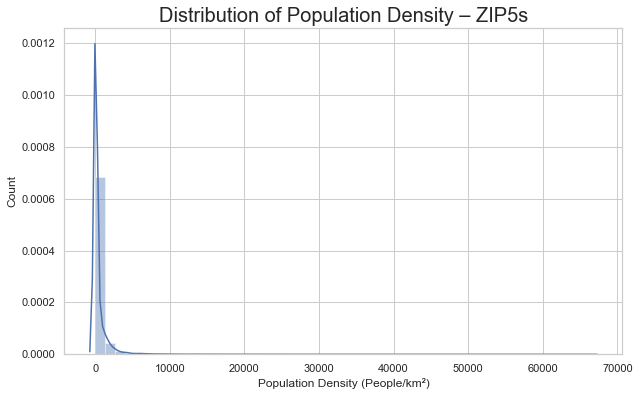

In [76]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df_merged_pop['pop_density_km2'])
plt.title('Distribution of Population Density – ZIP5s', fontsize = 20)
plt.xlabel('Population Density (People/km²)')
plt.ylabel('Count')

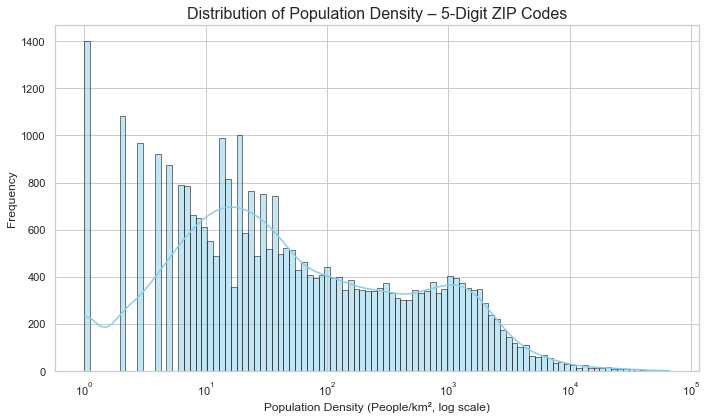

In [77]:
clean_pop_density= df_merged_pop['pop_density_km2']
clean_pop_density= clean_pop_density.replace([np.inf, -np.inf], np.nan).dropna()
clean_pop_density= clean_pop_density[clean_pop_density > 0]

plt.figure(figsize= (10, 6))
sns.histplot(clean_pop_density, bins= 100, kde= True, log_scale= True, color= 'skyblue', edgecolor= 'black')

plt.title('Distribution of Population Density – 5-Digit ZIP Codes', fontsize= 16)
plt.xlabel('Population Density (People/km², log scale)', fontsize= 12)
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

--- Distribution of population sizes for 3-digit ---

    As expected, this distribution is more compact and aggregating ZIP5 codes into ZIP3 areas 
    smooths out the extreme peaks and reduces variation. 
    The highest densities are still visible, but much less frequent

In [78]:
zip3_grouped

,zip3c,state,population,land_area_km2
0,010,Massachusetts,469375,3280.116609
1,011,Massachusetts,168835,106.083030
2,012,Massachusetts,130689,2360.467856
3,013,Massachusetts,83111,2029.083678
4,014,Massachusetts,211812,1231.149054
...,...,...,...,...
884,995,Alaska,320660,149810.726268
885,996,Alaska,184083,138819.400255
886,997,Alaska,134189,261368.179739
887,998,Alaska,49595,35487.047529


In [79]:
zip3_grouped['pop3_density_km2']= zip3_grouped['population']/ zip3_grouped['land_area_km2']
zip3_grouped

,zip3c,state,population,land_area_km2,pop3_density_km2
0,010,Massachusetts,469375,3280.116609,143.097047
1,011,Massachusetts,168835,106.083030,1591.536365
2,012,Massachusetts,130689,2360.467856,55.365719
3,013,Massachusetts,83111,2029.083678,40.959868
4,014,Massachusetts,211812,1231.149054,172.044156
...,...,...,...,...,...
884,995,Alaska,320660,149810.726268,2.140434
885,996,Alaska,184083,138819.400255,1.326061
886,997,Alaska,134189,261368.179739,0.513410
887,998,Alaska,49595,35487.047529,1.397552


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

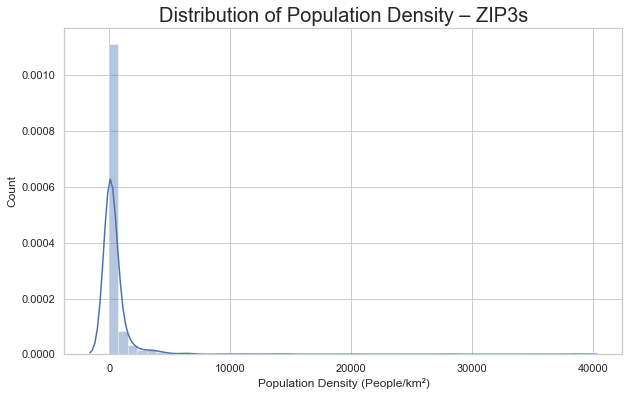

In [80]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(zip3_grouped['pop3_density_km2'])
plt.title('Distribution of Population Density – ZIP3s', fontsize = 20)
plt.xlabel('Population Density (People/km²)')
plt.ylabel('Count')

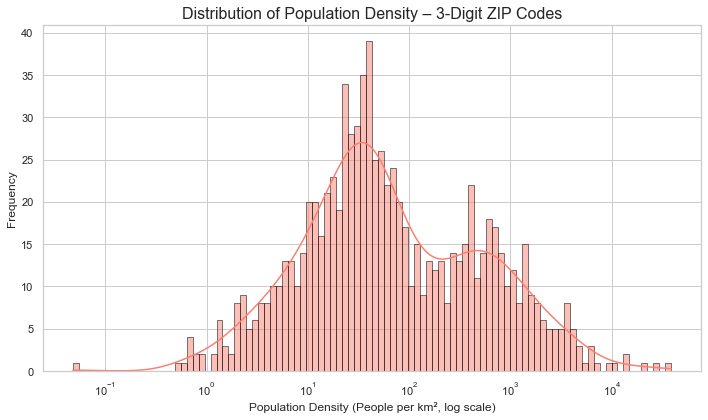

In [81]:
clean_pop3_density= zip3_grouped['pop3_density_km2']
clean_pop3_density= clean_pop3_density.replace([np.inf, -np.inf], np.nan).dropna()
clean_pop3_density= clean_pop3_density[clean_pop3_density > 0]

plt.figure(figsize= (10, 6))
sns.histplot(clean_pop3_density, bins= 100, kde= True, log_scale= True, color= 'salmon', edgecolor= 'black')

plt.title('Distribution of Population Density – 3-Digit ZIP Codes', fontsize= 16)
plt.xlabel('Population Density (People per km², log scale)', fontsize= 12)
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

--- Distribution of population sizes for 5-digit & 3-digit ---

    ZIP3 areas provide a broader, less granular view of population distribution, 
    ZIP5 codes are better for identifying hyper-dense urban regions

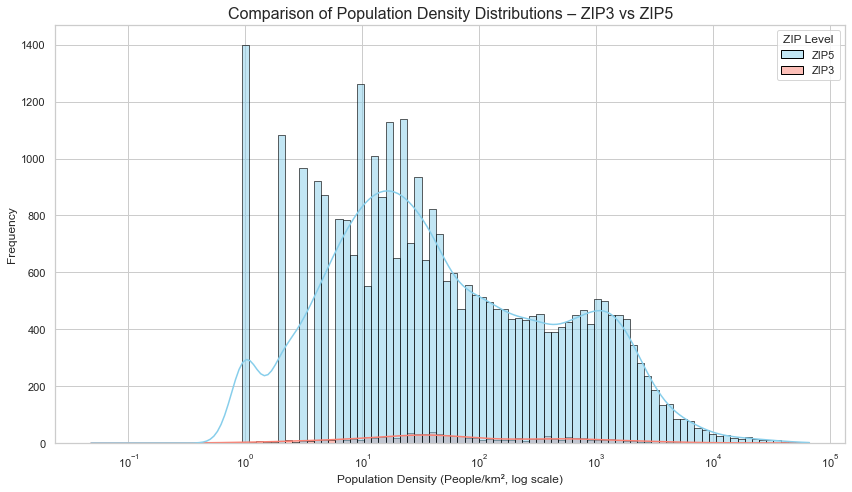

In [82]:
clean_pop_density= df_merged_pop['pop_density_km2'].replace([np.inf, -np.inf], np.nan).dropna()
clean_pop_density= clean_pop_density[clean_pop_density > 0]

clean_pop3_density= zip3_grouped['pop3_density_km2'].replace([np.inf, -np.inf], np.nan).dropna()
clean_pop3_density= clean_pop3_density[clean_pop3_density > 0]

combined_density= pd.concat([
    pd.DataFrame({'Population Density': clean_pop_density, 'ZIP Level': 'ZIP5'}),
    pd.DataFrame({'Population Density': clean_pop3_density, 'ZIP Level': 'ZIP3'})
], ignore_index= True)

plt.figure(figsize= (12, 7))
sns.histplot(
    data= combined_density,
    x= 'Population Density',
    hue= 'ZIP Level',
    bins= 100,
    log_scale= True,
    kde= True,
    palette= ['skyblue', 'salmon'],
    edgecolor= 'black')

plt.title('Comparison of Population Density Distributions – ZIP3 vs ZIP5', fontsize= 16)
plt.xlabel('Population Density (People/km², log scale)', fontsize= 12)
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
